In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [ ]:
! pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#! ls /content/drive/MyDrive/'ML Studies'/train.csv

'/content/drive/MyDrive/ML Studies/train.csv'


In [ ]:
#import nltk

In [ ]:
#nltk.download()

In [ ]:
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize, sent_tokenize
#stop_words = set(stopwords.words('english'))

In [ ]:
#tokenized = sent_tokenize(df["target"][0])
#tokenized

**0. Input the data and basics**




In [21]:
df = pd.read_csv("/content/drive/MyDrive/ML Studies/train.csv")
df

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00
...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50
36471,756ec035e694722b,wood article,wooden material,B44,0.75


# New Section

In [22]:
df["context_group"] = df["context"].str[0]
sorted(df["context_group"].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [23]:
df["number_of_words"] = df["target"].str.split().apply(len).values
df.head()

,id,anchor,target,context,score,context_group,number_of_words
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,A,3
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,A,3
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,A,2
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,A,2
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A,2


 **1. Counts number of words**

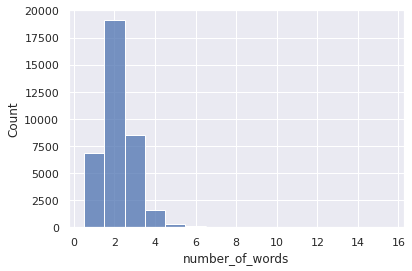

In [24]:
sns.set_theme()
ax = sns.histplot(df["number_of_words"], binwidth=1, discrete=True)

In [25]:
df.groupby(["context_group"]).count()

,id,anchor,target,context,score,number_of_words
context_group,,,,,,
A,4094,4094,4094,4094,4094,4094
B,8019,8019,8019,8019,8019,8019
C,5288,5288,5288,5288,5288,5288
D,1279,1279,1279,1279,1279,1279
E,1531,1531,1531,1531,1531,1531
F,4054,4054,4054,4054,4054,4054
G,6013,6013,6013,6013,6013,6013
H,6195,6195,6195,6195,6195,6195


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, Future

(0.0, 8.0)

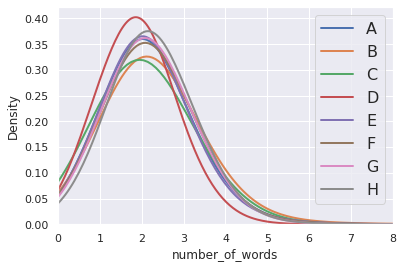

In [26]:
sns.set_theme();
for gp in sorted(df["context_group"].unique()):
  sub_df = df[df["context_group"]==gp]
  sns.distplot(sub_df["number_of_words"], hist=False, kde=True, 
               kde_kws = {'linewidth': 2, 'bw':1})
plt.legend(sorted(df["context_group"].unique()), prop={'size': 16})
plt.xlim(0,8)

In [27]:
df.groupby(["score"]).count()

,id,anchor,target,context,context_group,number_of_words
score,,,,,,
0.00,7471,7471,7471,7471,7471,7471
0.25,11519,11519,11519,11519,11519,11519
0.50,12300,12300,12300,12300,12300,12300
0.75,4029,4029,4029,4029,4029,4029
1.00,1154,1154,1154,1154,1154,1154


**2. Score Distribution**

In [28]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Overall distribution of score

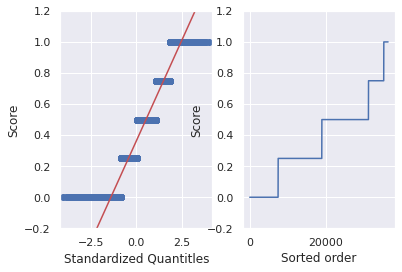

In [29]:
fig, ax = plt.subplots(1,2)
sm.qqplot(df["score"], line="s", ax=ax[0] )
ax[0].set_xlabel("Standardized Quantitles")
ax[0].set_ylabel("Score")
ax[0].set_ylim(-0.2, 1.2)

plt.plot(df["score"].sort_values().reset_index(drop=True), axes=ax[1] )
ax[1].set_xlabel("Sorted order")
ax[1].set_ylabel("Score")
ax[1].set_ylim(-0.2, 1.2)

plt.show()


Distribution of score for EACH context group

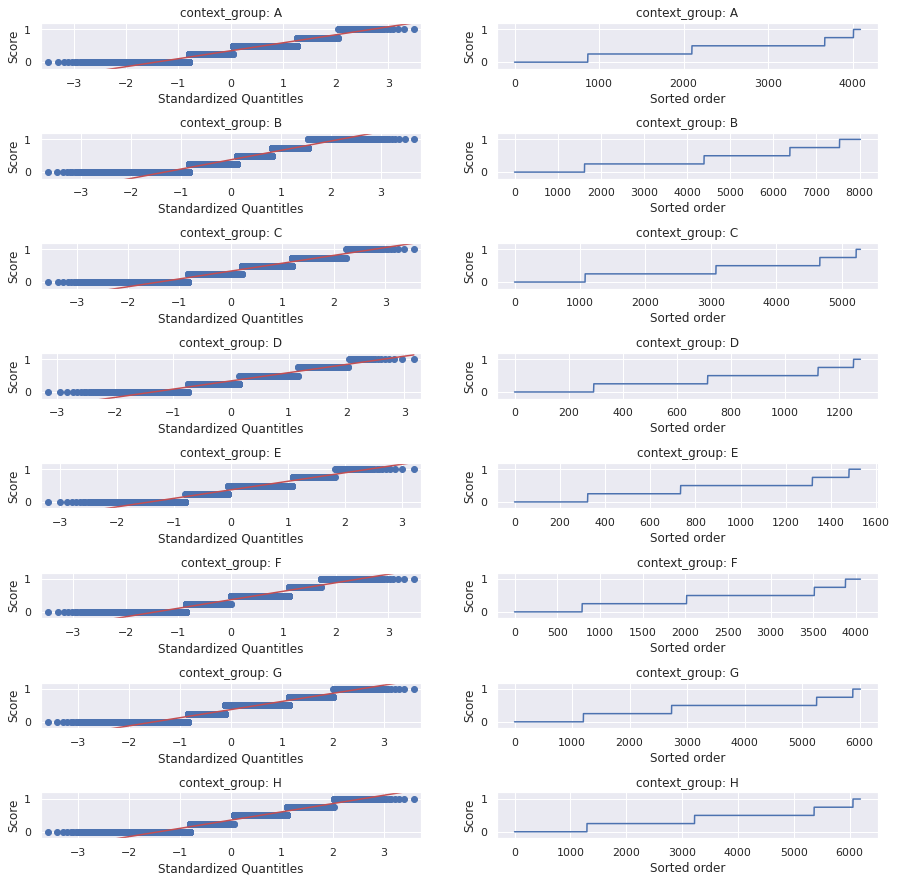

In [30]:
len_gp = len(df["context_group"].unique())
fig, ax = plt.subplots(len_gp, 2, figsize=(15,15))
for i, gp in enumerate(sorted(df["context_group"].unique())):

  sub_df = df[df["context_group"]==gp]

  sm.qqplot(sub_df["score"], line="s", ax=ax[i,0] )
  ax[i,0].set_xlabel("Standardized Quantitles")
  ax[i,0].set_ylabel("Score")
  ax[i,0].set_ylim(-0.2, 1.2)
  ax[i,0].set_title("context_group: "+gp)

  ax[i,1].plot(sub_df["score"].sort_values().reset_index(drop=True))
  ax[i,1].set_xlabel("Sorted order")
  ax[i,1].set_ylabel("Score")
  ax[i,1].set_ylim(-0.2, 1.2)
  ax[i,1].set_title("context_group: "+gp) 

# set the spacing between subplots
plt.subplots_adjust(hspace=1.4)

plt.show()

In [31]:
from fuzzywuzzy import fuzz

In [41]:

def find_jaccard_index(df_row):
    target_set = set(df_row["target"].split())
    anchor_set = set(df_row["anchor"].split())
    return len(anchor_set.intersection(target_set)) / len(anchor_set.union(target_set))

def subset(df_row, col_a, col_b):
    return (df_row[col_a] in df_row[col_b]) and (len(df_row[col_b]) > len(df_row[col_a]))

# reference: https://www.jashds.com/blog/2019/05/13/fuzzy-stringmatching-python
# https://www.geeksforgeeks.org/fuzzywuzzy-python-library/

def fuzz_ratio(df_row, col_a, col_b):
    return fuzz.ratio(df_row[col_a], df_row[col_b]) / 100

def fuzz_partial_ratio(df_row, col_a, col_b):
    return fuzz.partial_ratio(df_row[col_a], df_row[col_b]) / 100

def fuzz_token_set_ratio(df_row, col_a, col_b):
    return fuzz.token_set_ratio(df_row[col_a], df_row[col_b]) / 100

def fuzz_token_sort_ratio(df_row, col_a, col_b):
    return fuzz.token_sort_ratio(df_row[col_a], df_row[col_b]) / 100

df["jaccard_index"] = df.apply(find_jaccard_index, axis=1)
df[["target", "anchor", "jaccard_index"]]

df["anchor ⊂ target"] = df.apply(subset, args=("anchor","target"), axis=1)
df["target ⊂ anchor"] = df.apply(subset, args=("target","anchor"), axis=1)


# fuzz_ratio ~ proportion of matched words
# fuzz_partial_ratio ~ best-matching sub-string of length ‘m’
# fuzz_token_set_ratio ~ don’t care about the number of times a word in the string
# fuzz_token_sort_ratio ~ match two strings , considered the order

df["fuzz_ratio"] = df.apply(fuzz_ratio, args=("anchor","target"), axis=1)
df["fuzz_partial_ratio"] = df.apply(fuzz_partial_ratio, args=("anchor","target"), axis=1)
df["fuzz_token_set_ratio"] = df.apply(fuzz_token_set_ratio, args=("anchor","target"), axis=1)
df["fuzz_token_sort_ratio"] = df.apply(fuzz_token_sort_ratio, args=("anchor","target"), axis=1)

In [42]:
df[["target", "anchor", "fuzz_ratio", "fuzz_partial_ratio", "fuzz_token_set_ratio", "fuzz_token_sort_ratio"]].head(10)

,target,anchor,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio
0,abatement of pollution,abatement,0.58,1.00,1.00,0.58
1,act of abating,abatement,0.43,0.62,0.52,0.52
2,active catalyst,abatement,0.33,0.33,0.33,0.33
3,eliminating process,abatement,0.21,0.33,0.21,0.21
4,forest region,abatement,0.27,0.35,0.27,0.27
5,greenhouse gases,abatement,0.24,0.33,0.32,0.32
6,increased rate,abatement,0.35,0.44,0.35,0.35
7,measurement level,abatement,0.46,0.67,0.46,0.46
8,minimising sounds,abatement,0.15,0.22,0.15,0.15
9,mixing core materials,abatement,0.20,0.33,0.33,0.33


In [43]:
df.groupby("anchor ⊂ target")["score"].mean()

anchor ⊂ target
False    0.351248
True     0.572088
Name: score, dtype: float64

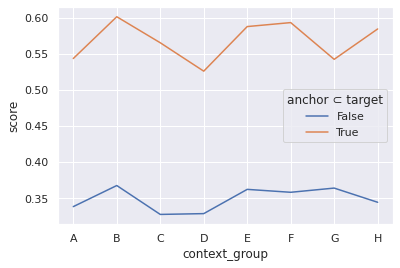

In [44]:
df.groupby(["context_group", "anchor ⊂ target"])["score"].mean().unstack(1).plot(ylabel="score")

In [45]:
df.groupby("target ⊂ anchor")["score"].mean()

target ⊂ anchor
False    0.356379
True     0.493391
Name: score, dtype: float64

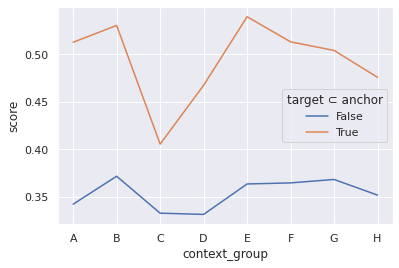

In [46]:
df.groupby(["context_group", "target ⊂ anchor"])["score"].mean().unstack(1).plot(ylabel="score")

In [49]:
# fuzz_ratio is Levenshtein Distance (LD), considered addition, subtraction, deletion


df.groupby(["context_group"])["fuzz_ratio", "score"].corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


fuzz_ratio     score
context_group                                 
A             fuzz_ratio    1.000000  0.361719
              score         0.361719  1.000000
B             fuzz_ratio    1.000000  0.534035
              score         0.534035  1.000000
C             fuzz_ratio    1.000000  0.416734
              score         0.416734  1.000000
D             fuzz_ratio    1.000000  0.403807
              score         0.403807  1.000000
E             fuzz_ratio    1.000000  0.459632
              score         0.459632  1.000000
F             fuzz_ratio    1.000000  0.496013
              score         0.496013  1.000000
G             fuzz_ratio    1.000000  0.367714
              score         0.367714  1.000000
H             fuzz_ratio    1.000000  0.388630
              score         0.388630  1.000000

In [52]:
df.groupby(["context_group"])["fuzz_token_sort_ratio", "score"].corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


fuzz_token_sort_ratio     score
context_group                                                       
A             fuzz_token_sort_ratio               1.000000  0.343762
              score                               0.343762  1.000000
B             fuzz_token_sort_ratio               1.000000  0.519277
              score                               0.519277  1.000000
C             fuzz_token_sort_ratio               1.000000  0.391384
              score                               0.391384  1.000000
D             fuzz_token_sort_ratio               1.000000  0.375395
              score                               0.375395  1.000000
E             fuzz_token_sort_ratio               1.000000  0.428122
              score                               0.428122  1.000000
F             fuzz_token_sort_ratio               1.000000  0.487290
              score                               0.487290  1.000000
G             fuzz_token_sort_ratio               1.000000  0.345028
              score                               0.345028  1.000000
H             fuzz_token_sort_ratio               1.000000  0.373968
              score                               0.373968  1.000000

**Inference among variables**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Correlation coefficient: 0.16090230238326797


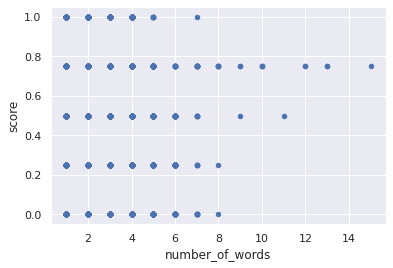

In [ ]:
df.plot.scatter(x="number_of_words", y="score")
print("Correlation coefficient: "+ str(df[["number_of_words", "score"]].corr().iloc[0][1]))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Correlation coefficient: 0.3917426026718358


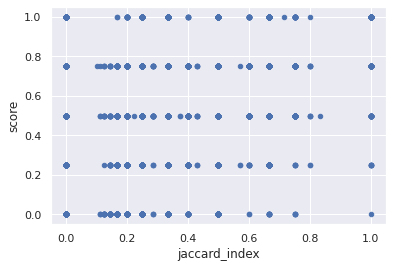

In [ ]:
df.plot.scatter(x="jaccard_index", y="score")
print("Correlation coefficient: "+ str(df[["jaccard_index", "score"]].corr().iloc[0][1]))

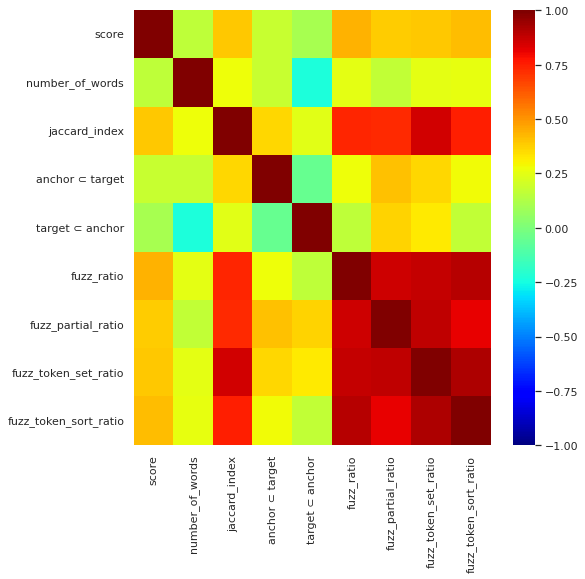

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap="jet", vmin=-1.0, vmax=1.0)

**Use Decision Tree Classifier to find the most important Features**

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In [139]:
X = df.drop(columns=["score", "id", "anchor", "target", "context"])
y = (df[["score"]]*4).astype(int)

In [114]:
ohe = OneHotEncoder(sparse=False).fit(X[["context_group"]])

codes = ohe.transform(X[["context_group"]])
feature_names = ohe.get_feature_names(['context_group'])
coded_df = pd.DataFrame(codes,columns=feature_names).astype(int)
X_adj = pd.concat([X.drop(columns="context_group"), coded_df], axis=1)
X_adj["anchor ⊂ target"] = X_adj["anchor ⊂ target"].astype(int)
X_adj["target ⊂ anchor"] = X_adj["target ⊂ anchor"].astype(int)
X_adj.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,number_of_words,jaccard_index,anchor ⊂ target,target ⊂ anchor,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,context_group_A,context_group_B,context_group_C,context_group_D,context_group_E,context_group_F,context_group_G,context_group_H
0,3,0.333333,1,0,0.58,1.00,1.00,0.58,1,0,0,0,0,0,0,0
1,3,0.000000,0,0,0.43,0.62,0.52,0.52,1,0,0,0,0,0,0,0
2,2,0.000000,0,0,0.33,0.33,0.33,0.33,1,0,0,0,0,0,0,0
3,2,0.000000,0,0,0.21,0.33,0.21,0.21,1,0,0,0,0,0,0,0
4,2,0.000000,0,0,0.27,0.35,0.27,0.27,1,0,0,0,0,0,0,0


In [140]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=5, min_samples_leaf=5)   
clf_model.fit(X_adj,y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [141]:
clf_model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [127]:
from sklearn import tree
import graphviz

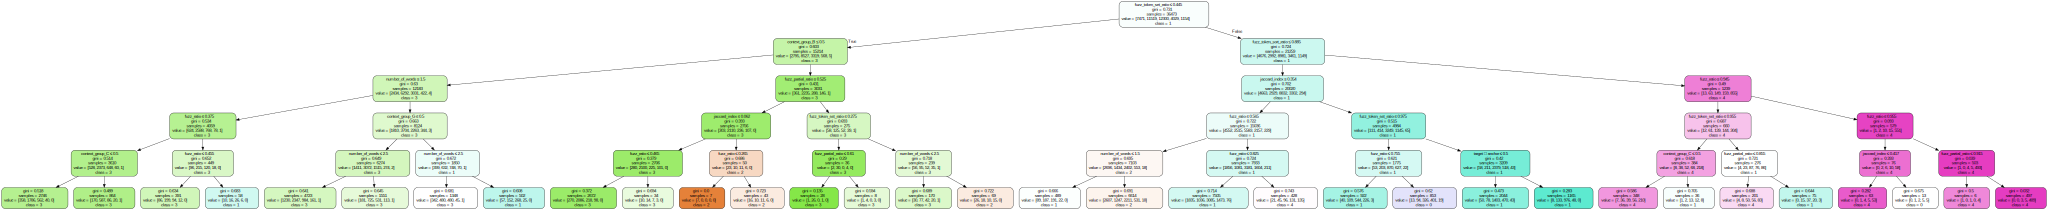

In [153]:
target = list(y["score"].unique().astype(str))
dot_data = tree.export_graphviz(clf_model,
                      out_file=None, 
                      feature_names=X_adj.columns,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph